# Figures for Paper

## SODA (as same period as SOSE)

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
from fastjmd95 import jmd95numba

In [2]:
wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SODA/datasets/wmt_budget_terms/wmt_budget_terms.zarr'))
wmt_budget_terms#.load()

<xarray.Dataset>
Dimensions:         (sigma2_bin: 699, time: 985)
Coordinates:
  * sigma2_bin      (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03
  * time            (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
Data variables:
    dVdt            (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    omega_trans     (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    psi_vel         (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    u_binned_left   (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    u_binned_right  (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>
    v_binned        (time, sigma2_bin) float64 dask.array<chunksize=(247, 175), meta=np.ndarray>

In [3]:
seaice = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SODA/datasets/seaice.zarr'))

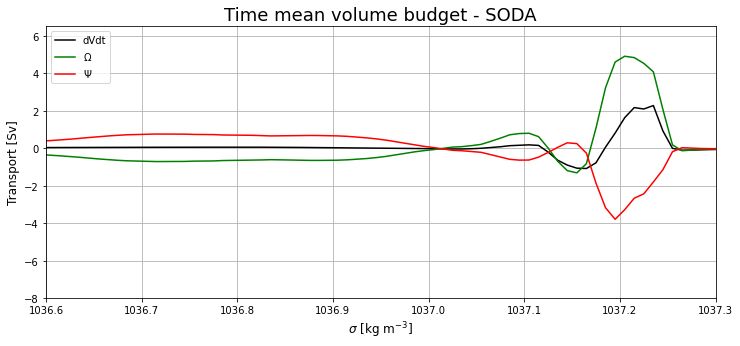

In [4]:
plt.figure(figsize=(12,5))
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dVdt', color='k')
wmt_budget_terms.omega_trans.mean(dim='time').plot(label=r'$\Omega$', color='green')
wmt_budget_terms.psi_vel.mean(dim='time').plot(label=r'$\Psi$', color='red')
plt.grid()
plt.legend()
plt.xlim(1036.6, 1037.3)
plt.ylim(-8,6.5)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
#plt.title(r'WMT volume budget in $\sigma$ space', fontsize=18);
plt.title('Time mean volume budget - SODA', fontsize=18);

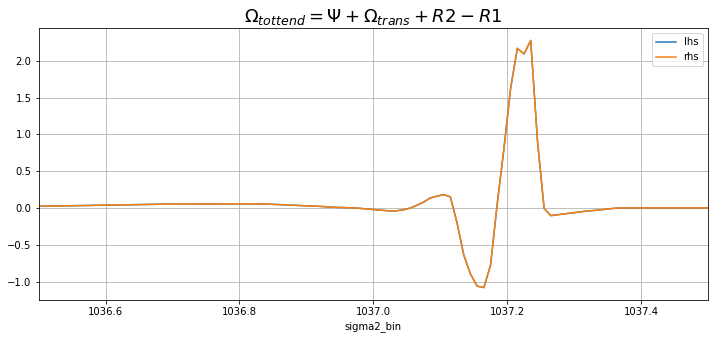

In [5]:
plt.figure(figsize=(12,5))
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='lhs')
(wmt_budget_terms.omega_trans + wmt_budget_terms.psi_vel).mean(dim='time').plot(label='rhs')
plt.grid()
plt.legend()
plt.xlim(1036.5, 1037.5)
plt.title(r'$\Omega_{tottend} = \Psi + \Omega_{trans} + R2 - R1$', fontsize=18, fontweight='bold');

In [6]:
wmt_budget_terms.time.sel(time='2010', method='nearest')

<xarray.DataArray 'time' (time: 36)>
array([cftime.DatetimeJulian(2010, 1, 8, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 1, 18, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 1, 28, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 2, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 2, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 2, 27, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 3, 9, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 3, 19, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 3, 29, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 4, 8, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 4, 18, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 4, 28, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 5, 8, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 5, 18, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 5, 28, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 6, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 6, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 6, 27, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 7, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 7, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 7, 27, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 8, 6, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 8, 16, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 8, 26, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 9, 5, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 9, 15, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 9, 25, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 10, 5, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 10, 15, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 10, 25, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 11, 4, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 11, 14, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 11, 24, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 12, 4, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 12, 14, 1, 0, 0, 0),
       cftime.DatetimeJulian(2010, 12, 24, 1, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2010-01-08 01:00:00 ... 2010-12-24 01:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [7]:
wmt_budget_terms.dVdt.rolling(time=3).mean(dim='time')

<ipython-input-7-fe7e4ee15bfb>:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  wmt_budget_terms.dVdt.rolling(time=3).mean(dim='time')


<xarray.DataArray 'dVdt' (time: 985, sigma2_bin: 699)>
dask.array<truediv, shape=(985, 699), dtype=float64, chunksize=(247, 175), chunktype=numpy.ndarray>
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03 1.039e+03
  * time        (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00

In [8]:
wmt_budget_terms.dVdt.groupby('time.month').mean(dim='time')

<xarray.DataArray 'dVdt' (month: 12, sigma2_bin: 699)>
dask.array<stack, shape=(12, 699), dtype=float64, chunksize=(1, 175), chunktype=numpy.ndarray>
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03 1.039e+03
  * month       (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [9]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    anom_chunk = anom.chunk({'time':-1, 'sigma2_bin':-1})
    anom_rolled = anom_chunk.rolling(time=36).mean(dim='time') #annual rolling mean to remove seasonal cycle
    return anom_rolled

In [10]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'),
                    wmt_budget_terms.psi_vel.rename('psi_vel'),
                    wmt_budget_terms.omega_trans.rename('omega_trans')])


In [11]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [12]:
clim_ds = anom_ds

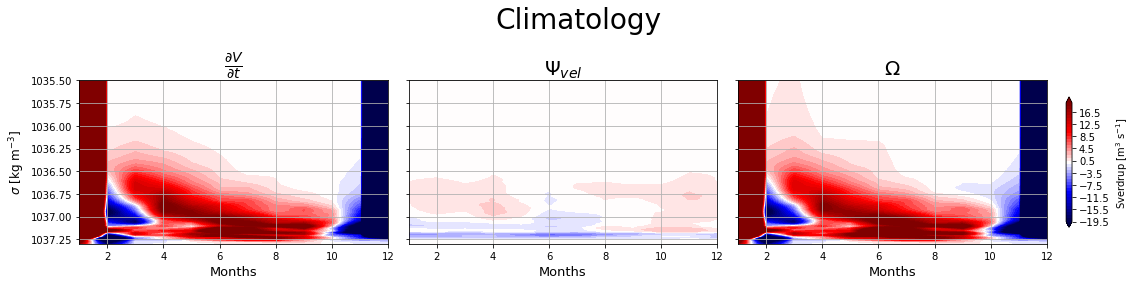

In [13]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(16, 4), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax0.contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax0.set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax0.set_xlabel('Months', fontsize=13)
ax0.set_ylim(1037.3, 1035.5)
#ax[0,0].set_xlim(xmin='1993')
ax0.grid()

psi_vel_clim = clim(clim_ds.psi_vel)
c_psi = ax1.contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax1)
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax1.set_title(r'$\Psi_{vel}$', fontsize=20)
ax1.set_xlabel('Months', fontsize=13)
ax1.set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax1.grid()

omega_clim = clim(clim_ds.omega_trans)
c_omega = ax2.contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax2)
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax2.set_title(r'$\Omega$', fontsize=20)
ax2.set_xlabel('Months', fontsize=13)
ax2.set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax2.grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

In [14]:
year_start_index =[0, 36, 73, 109, 146]

In [15]:
wmt_budget_terms.psi_vel.time.values[year_start_index]

array([cftime.DatetimeJulian(1993, 1, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1994, 1, 2, 1, 0, 0, 0),
       cftime.DatetimeJulian(1995, 1, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1996, 1, 2, 1, 0, 0, 0),
       cftime.DatetimeJulian(1997, 1, 6, 1, 0, 0, 0)], dtype=object)

In [16]:
anom(anom_ds.dVdt)

<ipython-input-9-3d3384b88b7f>:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  anom_rolled = anom_chunk.rolling(time=36).mean(dim='time') #annual rolling mean to remove seasonal cycle


<xarray.DataArray 'dVdt' (time: 985, sigma2_bin: 699)>
dask.array<truediv, shape=(985, 699), dtype=float64, chunksize=(967, 699), chunktype=numpy.ndarray>
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03 1.039e+03
  * time        (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    month       (time) int64 dask.array<chunksize=(985,), meta=np.ndarray>

In [21]:
dVdt_anom_rolled.time#.values[year_start_index]

<xarray.DataArray 'time' (time: 985)>
array([cftime.DatetimeJulian(1993, 1, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(1993, 1, 27, 1, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 11, 27, 1, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 17, 1, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1993-01-07 01:00:00 ... 2019-12-17 01:00:00
    month    (time) int64 dask.array<chunksize=(985,), meta=np.ndarray>
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [22]:
2019-1993

26

In [39]:
28*36

1008

In [41]:
np.arange(0,1008,36)

array([  0,  36,  72, 108, 144, 180, 216, 252, 288, 324, 360, 396, 432,
       468, 504, 540, 576, 612, 648, 684, 720, 756, 792, 828, 864, 900,
       936, 972])

In [46]:
year_start_index = list(np.arange(0,1008,36)) #[0, 36, 73, 109, 146]

In [47]:
dVdt_anom_rolled.time.values[year_start_index]

array([cftime.DatetimeJulian(1993, 1, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1994, 1, 2, 1, 0, 0, 0),
       cftime.DatetimeJulian(1994, 12, 28, 1, 0, 0, 0),
       cftime.DatetimeJulian(1995, 12, 23, 1, 0, 0, 0),
       cftime.DatetimeJulian(1996, 12, 17, 1, 0, 0, 0),
       cftime.DatetimeJulian(1997, 12, 12, 1, 0, 0, 0),
       cftime.DatetimeJulian(1998, 12, 7, 1, 0, 0, 0),
       cftime.DatetimeJulian(1999, 12, 2, 1, 0, 0, 0),
       cftime.DatetimeJulian(2000, 11, 26, 1, 0, 0, 0),
       cftime.DatetimeJulian(2001, 11, 21, 1, 0, 0, 0),
       cftime.DatetimeJulian(2002, 11, 16, 1, 0, 0, 0),
       cftime.DatetimeJulian(2003, 11, 11, 1, 0, 0, 0),
       cftime.DatetimeJulian(2004, 11, 5, 1, 0, 0, 0),
       cftime.DatetimeJulian(2005, 10, 31, 1, 0, 0, 0),
       cftime.DatetimeJulian(2006, 10, 26, 1, 0, 0, 0),
       cftime.DatetimeJulian(2007, 10, 21, 1, 0, 0, 0),
       cftime.DatetimeJulian(2008, 10, 15, 1, 0, 0, 0),
       cftime.DatetimeJulian(2009, 10, 10, 1, 0, 0, 0),

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(16, 4), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

#ax00 = ax0.twinx()
#ax10 = ax1.twinx()
#ax20 = ax2.twinx()

dVdt_anom_rolled = anom(anom_ds.dVdt) / 1e6
c = ax0.pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-20, vmax=20, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax0)
ax0.set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax0.set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax0.set_ylim(1037.3, 1036.5)
ax0.set_xticks(dVdt_anom_rolled.time.values[year_start_index])
#ax0.set_xticklabels(np.arange(2006, 2011))
ax0.set_xlabel('Time', fontsize=13)
#ax00.plot(sam.time.isel(index=slice(49, 54)), sam.ANN.isel(index=slice(49, 54)))
#ax00.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax0.grid()

psi_vel_anom_rolled = anom(anom_ds.psi_vel)
c_psi = ax1.pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-20, vmax=20, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax1)
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax1.set_title(r'$\Psi_{vel}$', fontsize=20)
ax1.set_ylim(1037.3, 1036.5)
ax1.set_xticks(psi_vel_anom_rolled.time.values[year_start_index])
#ax1.set_xticklabels(np.arange(2006, 2011))
ax1.set_xlabel('Time', fontsize=13)
#ax10.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax1.grid()

omega_anom_rolled = anom(anom_ds.omega_trans)
c_omega = ax2.pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-20, vmax=20, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax2)
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax2.set_title(r'$\Omega$', fontsize=20)
ax2.set_ylim(1037.3, 1036.5)
ax2.set_xticks(omega_anom_rolled.time.values[year_start_index])
#ax2.set_xticklabels(np.arange(2006, 2011))
ax2.set_xlabel('Time', fontsize=13)
#ax20.plot(dVdt_anom_rolled.time.values[year_start_index], sam.ANN.isel(index=slice(50, 55)))
ax2.grid()

plt.suptitle('Anomalous WMT budget - SODA', fontsize=28)
plt.tight_layout();

AttributeError: 'NetCDFTimeDateLocator' object has no attribute 'ndays'

AttributeError: 'NetCDFTimeDateLocator' object has no attribute 'ndays'

<Figure size 1152x288 with 4 Axes>